# Evaluación modular 3

## Configuraciones iniciales

In [172]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker

# Configuración para visualizaciones
plt.style.use('default')
sns.set_palette("husl")

## 1. Generación de archivos de datos sintéticos

In [173]:
# Inicialización de Faker
fake = Faker('es_ES')
#np.random.seed(42)  # Para reproducibilidad

# CLIENTES
n_clientes = 100
clientes = pd.DataFrame({
    'id_cliente': range(1, n_clientes + 1),
    'nombre': [fake.name() for _ in range(n_clientes)],
    'edad': np.random.choice(list(range(18, 70)) + [np.nan], n_clientes, p=[.01]*52 + [.48]),
    'ciudad': np.random.choice(
        ['Santiago', 'Concepción', 'Valparaíso', 'Antofagasta', 'Sntiago', 'Vina del Mr', np.nan],
        n_clientes),
    'ingreso': np.round(np.random.normal(1800, 900, n_clientes), 0)
})

# Insertar valores extremos y nulos en ingreso
clientes.loc[np.random.choice(clientes.index, 4), 'ingreso'] = [10000, 0, 30000, np.nan]
clientes.to_csv('clientes.csv', index=False)

# VENTAS
n_ventas = 500
ventas = pd.DataFrame({
    'id_venta': range(1, n_ventas + 1),
    'id_cliente': np.random.choice(clientes['id_cliente'].tolist() + [np.nan], n_ventas),
    'fecha': pd.to_datetime(np.random.choice(
        pd.date_range('2023-01-01', '2024-12-31', freq='D'), n_ventas)),
    'producto': np.random.choice(['A', 'B', 'C', 'D', 'X'], n_ventas),
    'monto': np.round(np.random.uniform(500, 8000, n_ventas), 0)
})

# Añadir errores de formato y nulos en fecha y monto
ventas.loc[np.random.choice(ventas.index, 7), 'fecha'] = [
    '2023/05/20', '31-12-2024', None, '2024-01-02', 'julio 2023', np.nan, '2024/03/15']
ventas.loc[np.random.choice(ventas.index, 5), 'monto'] = [np.nan, 50000, 0, None, -100]

ventas.to_excel('ventas.xlsx', index=False)

print(f"- Archivo clientes.csv generado: {len(clientes)} registros")
print(f"- Archivo ventas.xlsx generado: {len(ventas)} registros")

- Archivo clientes.csv generado: 100 registros
- Archivo ventas.xlsx generado: 500 registros


## 2. Extracción y Exploración de los datos

In [174]:
# Lectura de archivos
df_clientes = pd.read_csv('clientes.csv')
df_ventas = pd.read_excel('ventas.xlsx')

### 2.1 Exploracipon de clientes.csv

In [175]:
print("\n--- CLIENTES ---")
print("Información general:")
print(df_clientes.info())

print(f"\nForma del DataFrame: {df_clientes.shape}")

print("\nPrimeras 5 filas:")
print(df_clientes.head())

print(f"\nValores únicos por columna:")
for col in df_clientes.columns:
    print(f"  {col}: {df_clientes[col].nunique()} valores únicos")


--- CLIENTES ---
Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  100 non-null    int64  
 1   nombre      100 non-null    object 
 2   edad        43 non-null     float64
 3   ciudad      87 non-null     object 
 4   ingreso     99 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB
None

Forma del DataFrame: (100, 5)

Primeras 5 filas:
   id_cliente                          nombre  edad      ciudad  ingreso
0           1          Luciano Miralles Ariño   NaN         NaN   2787.0
1           2          Federico Carbó Camacho  26.0    Santiago   1021.0
2           3           Lara Pallarès Herrera   NaN         NaN   1633.0
3           4        Santiago Gutierrez-Ayuso  44.0  Concepción  10000.0
4           5  Jose Manuel Álvaro-Ballesteros  42.0  Valparaíso   1864.0

Valores únicos 

### 2.2 Exploración de ventas.xlsx

In [176]:
# Analisis exploratorio
print("\n--- VENTAS ---")
print("Información general:")
print(df_ventas.info())

print(f"\nForma del DataFrame: {df_ventas.shape}")

print("\nPrimeras 5 filas:")
print(df_ventas.head())

print(f"\nValores únicos por columna:")
for col in df_ventas.columns:
    print(f"  {col}: {df_ventas[col].nunique()} valores únicos")

# Análisis de duplicados
print(f"\n--- ANÁLISIS DE DUPLICADOS ---")
print(f"Duplicados en clientes: {df_clientes.duplicated().sum()}")
print(f"Duplicados en ventas: {df_ventas.duplicated().sum()}")

# Análisis de estructura y exploración preliminar
print(f"\n--- ESTRUCTURA DE DATOS ---")
print(f"Ciudades únicas: {df_clientes['ciudad'].dropna().unique()}")
print(f"Productos únicos: {df_ventas['producto'].unique()}")

print(f"\n--- ANÁLISIS PRELIMINAR ---")
print("Clientes:")
print(f"- Rango de edades: {df_clientes['edad'].min():.0f} - {df_clientes['edad'].max():.0f} años")
print(f"- Ingreso promedio: ${df_clientes['ingreso'].mean():.0f}")
print(f"- Ingreso mediano: ${df_clientes['ingreso'].median():.0f}")
print(f"- Ciudad más frecuente: {df_clientes['ciudad'].mode()[0] if not df_clientes['ciudad'].mode().empty else 'N/A'}")


print("Ventas:")
fechas_validas = df_ventas['fecha'][pd.to_datetime(df_ventas['fecha'], errors='coerce').notna()]
if len(fechas_validas) > 0:
    fechas_dt = pd.to_datetime(fechas_validas, errors='coerce')
    print(f"- Rango de fechas válidas: {fechas_dt.min()} a {fechas_dt.max()}")
else:
    print(f"- Fechas requieren limpieza (formatos mixtos detectados)")
print(f"- Monto promedio: ${df_ventas['monto'].mean():.0f}")
print(f"- Monto mediano: ${df_ventas['monto'].median():.0f}")
print(f"- Producto más vendido: {df_ventas['producto'].mode()[0]}")


--- VENTAS ---
Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_venta    500 non-null    int64  
 1   id_cliente  494 non-null    float64
 2   fecha       498 non-null    object 
 3   producto    500 non-null    object 
 4   monto       498 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB
None

Forma del DataFrame: (500, 5)

Primeras 5 filas:
   id_venta  id_cliente                fecha producto   monto
0         1        55.0  2023-12-27 00:00:00        A  4070.0
1         2        66.0  2024-10-07 00:00:00        D  2524.0
2         3        60.0  2024-05-18 00:00:00        D  5864.0
3         4        24.0  2024-08-10 00:00:00        D  7678.0
4         5        92.0  2023-01-30 00:00:00        B  5682.0

Valores únicos por columna:
  id_venta: 500 valores únicos
  id_cliente: 100 valo

In [177]:
print(f"\n--- PROBLEMAS DETECTADOS ---")
print("Datos que requieren limpieza:")
print(f"- Errores tipográficos en ciudades detectados")
print(f"- Fechas en múltiples formatos requieren estandarización")
print(f"- Valores negativos en montos: {(df_ventas['monto'] < 0).sum()}")
print(f"- Posibles IDs de clientes nulos en ventas detectados")


--- PROBLEMAS DETECTADOS ---
Datos que requieren limpieza:
- Errores tipográficos en ciudades detectados
- Fechas en múltiples formatos requieren estandarización
- Valores negativos en montos: 1
- Posibles IDs de clientes nulos en ventas detectados


## 3. Limpieza inicial y transformación de tipos

In [178]:
# Crear copias para trabajar
clientes_clean = df_clientes.copy()
ventas_clean = df_ventas.copy()

# Normalizar nombres de columnas (convertir a minúsculas y reemplazar espacios)
clientes_clean.columns = clientes_clean.columns.str.lower().str.replace(' ', '_')
ventas_clean.columns = ventas_clean.columns.str.lower().str.replace(' ', '_')

# Corrección de errores de escritura en ciudades
ciudad_corrections = {
    'Sntiago': 'Santiago',
    'Vina del Mr': 'Viña del Mar'
}
clientes_clean['ciudad'] = clientes_clean['ciudad'].replace(ciudad_corrections)
print(f"- Ciudades corregidas: {list(ciudad_corrections.keys())}")

# Limpieza y conversión de fechas en ventas
def clean_fecha(fecha):
    if pd.isna(fecha):
        return np.nan
    if isinstance(fecha, str):
        try:
            # Diferentes formatos de fecha
            if '/' in fecha and len(fecha.split('/')[0]) == 4:  # YYYY/MM/DD
                return pd.to_datetime(fecha, format='%Y/%m/%d')
            elif '/' in fecha and len(fecha.split('/')[0]) == 2:  # DD/MM/YYYY
                return pd.to_datetime(fecha, format='%d/%m/%Y')
            elif '-' in fecha and len(fecha.split('-')[0]) == 2:  # DD-MM-YYYY
                return pd.to_datetime(fecha, format='%d-%m-%Y')
            elif '.' in fecha:  # YYYY.MM.DD
                return pd.to_datetime(fecha, format='%Y.%m.%d')
            elif 'julio' in fecha.lower():
                return pd.to_datetime('2023-07-15')  # Aproximación conservadora
            else:
                return pd.to_datetime(fecha)
        except:
            return np.nan
    return fecha

ventas_clean['fecha'] = ventas_clean['fecha'].apply(clean_fecha)

# Conversión de tipos de datos
clientes_clean['ingreso'] = pd.to_numeric(clientes_clean['ingreso'], errors='coerce')
ventas_clean['monto'] = pd.to_numeric(ventas_clean['monto'], errors='coerce')

# Eliminar duplicados
duplicados_clientes = clientes_clean.duplicated().sum()
duplicados_ventas = ventas_clean.duplicated().sum()
clientes_clean = clientes_clean.drop_duplicates()
ventas_clean = ventas_clean.drop_duplicates()
print(f"- Duplicados eliminados: Clientes: {duplicados_clientes}, Ventas: {duplicados_ventas}")

# Validación de integridad referencial (manejo de ventas anónimas)
ids_validos = set(clientes_clean['id_cliente'])
ventas_con_cliente_invalido = ventas_clean[
    ventas_clean['id_cliente'].notna() & 
    ~ventas_clean['id_cliente'].isin(ids_validos)
]
print(f"- Ventas con ID de cliente inexistente: {len(ventas_con_cliente_invalido)}")
if len(ventas_con_cliente_invalido) > 0:
    print(f"  IDs inexistentes: {sorted(ventas_con_cliente_invalido['id_cliente'].unique())}")
    # Marcar como ventas anónimas (convertir a NaN)
    ventas_clean.loc[ventas_con_cliente_invalido.index, 'id_cliente'] = np.nan

ventas_anonimas = ventas_clean['id_cliente'].isna().sum()
print(f"- Total de ventas anónimas: {ventas_anonimas}")


- Ciudades corregidas: ['Sntiago', 'Vina del Mr']
- Duplicados eliminados: Clientes: 0, Ventas: 0
- Ventas con ID de cliente inexistente: 0
- Total de ventas anónimas: 6


## 4. Detección y Tratamiento de valores perdidos

In [179]:
# Análisis de valores nulos
print("VALORES NULOS POR COLUMNA:")
print("\nClientes:")
clientes_nulls = clientes_clean.isnull().sum()
for col in clientes_clean.columns:
    nulls = clientes_nulls[col]
    pct = (nulls / len(clientes_clean)) * 100
    print(f"  {col}: {nulls} valores nulos ({pct:.1f}%)")

print("\nVentas:")
ventas_nulls = ventas_clean.isnull().sum()
for col in ventas_clean.columns:
    nulls = ventas_nulls[col]
    pct = (nulls / len(ventas_clean)) * 100
    print(f"  {col}: {nulls} valores nulos ({pct:.1f}%)")

# Estrategias de tratamiento
print("\nESTRATEGIAS DE TRATAMIENTO:")

# CLIENTES
print("\nClientes:")

# Edad: imputar con mediana (más robusta que la media)
if clientes_clean['edad'].isnull().any():
    edad_mediana = clientes_clean['edad'].median()
    clientes_clean['edad'].fillna(edad_mediana, inplace=True)
    print(f"- Edad: imputada con mediana ({edad_mediana:.0f} años)")

# Ciudad: imputar con moda
if clientes_clean['ciudad'].isnull().any():
    ciudad_moda = clientes_clean['ciudad'].mode()[0] if not clientes_clean['ciudad'].mode().empty else 'Santiago'
    clientes_clean['ciudad'].fillna(ciudad_moda, inplace=True)
    print(f"- Ciudad: imputada con moda ({ciudad_moda})")

# Ingreso: imputar con mediana (robusta a outliers)
if clientes_clean['ingreso'].isnull().any():
    ingreso_mediana = clientes_clean['ingreso'].median()
    clientes_clean['ingreso'].fillna(ingreso_mediana, inplace=True)
    print(f"- Ingreso: imputado con mediana (${ingreso_mediana:.0f})")

# VENTAS
print("\nVentas:")

# Fecha: eliminar registros sin fecha (crítico para análisis temporal)
ventas_sin_fecha = ventas_clean['fecha'].isnull().sum()
if ventas_sin_fecha > 0:
    ventas_clean = ventas_clean.dropna(subset=['fecha'])
    print(f"- Fecha: eliminados {ventas_sin_fecha} registros sin fecha válida")

# Monto: eliminar registros sin monto (crítico para análisis financiero)
ventas_sin_monto = ventas_clean['monto'].isnull().sum()
if ventas_sin_monto > 0:
    ventas_clean = ventas_clean.dropna(subset=['monto'])
    print(f"- Monto: eliminados {ventas_sin_monto} registros sin monto")

# ID Cliente: mantener nulos (pueden ser ventas anónimas)
print("- ID Cliente: nulos mantenidos (ventas anónimas permitidas)")

# JUSTIFICACIÓN DE CRITERIOS
print("\nJUSTIFICACIÓN DE CRITERIOS:")
print("- Edad e Ingreso: Mediana más robusta que media ante outliers")
print("- Ciudad: Moda representa la ubicación más común de clientes")
print("- Fecha y Monto: Eliminación porque son críticos para el análisis")
print("- ID Cliente: Mantenido para preservar información de ventas")



VALORES NULOS POR COLUMNA:

Clientes:
  id_cliente: 0 valores nulos (0.0%)
  nombre: 0 valores nulos (0.0%)
  edad: 57 valores nulos (57.0%)
  ciudad: 13 valores nulos (13.0%)
  ingreso: 1 valores nulos (1.0%)

Ventas:
  id_venta: 0 valores nulos (0.0%)
  id_cliente: 6 valores nulos (1.2%)
  fecha: 2 valores nulos (0.4%)
  producto: 0 valores nulos (0.0%)
  monto: 2 valores nulos (0.4%)

ESTRATEGIAS DE TRATAMIENTO:

Clientes:
- Edad: imputada con mediana (44 años)
- Ciudad: imputada con moda (Santiago)
- Ingreso: imputado con mediana ($1962)

Ventas:
- Fecha: eliminados 2 registros sin fecha válida
- Monto: eliminados 2 registros sin monto
- ID Cliente: nulos mantenidos (ventas anónimas permitidas)

JUSTIFICACIÓN DE CRITERIOS:
- Edad e Ingreso: Mediana más robusta que media ante outliers
- Ciudad: Moda representa la ubicación más común de clientes
- Fecha y Monto: Eliminación porque son críticos para el análisis
- ID Cliente: Mantenido para preservar información de ventas


## 5. Detección y tratamiento de Outliers

In [180]:
def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

print("DETECCIÓN DE OUTLIERS (Método IQR):")

# Outliers en edad
outliers_edad, edad_min, edad_max, q1_edad, q3_edad, iqr_edad = detect_outliers_iqr(clientes_clean, 'edad')
print(f"\nEdad:")
print(f"  Q1: {q1_edad:.0f}, Q3: {q3_edad:.0f}, IQR: {iqr_edad:.0f}")
print(f"  Rango normal: {edad_min:.1f} - {edad_max:.1f}")
print(f"  Outliers detectados: {len(outliers_edad)} registros")
if len(outliers_edad) > 0:
    print(f"  Valores outliers: {sorted(outliers_edad['edad'].unique())}")

# Outliers en ingreso
outliers_ingreso, ingreso_min, ingreso_max, q1_ingreso, q3_ingreso, iqr_ingreso = detect_outliers_iqr(clientes_clean, 'ingreso')
print(f"\nIngreso:")
print(f"  Q1: ${q1_ingreso:.0f}, Q3: ${q3_ingreso:.0f}, IQR: ${iqr_ingreso:.0f}")
print(f"  Rango normal: ${ingreso_min:.0f} - ${ingreso_max:.0f}")
print(f"  Outliers detectados: {len(outliers_ingreso)} registros")
if len(outliers_ingreso) > 0:
    print(f"  Valores outliers: {sorted(outliers_ingreso['ingreso'].unique())}")

# Outliers en monto
outliers_monto, monto_min, monto_max, q1_monto, q3_monto, iqr_monto = detect_outliers_iqr(ventas_clean, 'monto')
print(f"\nMonto:")
print(f"  Q1: ${q1_monto:.0f}, Q3: ${q3_monto:.0f}, IQR: ${iqr_monto:.0f}")
print(f"  Rango normal: ${monto_min:.0f} - ${monto_max:.0f}")
print(f"  Outliers detectados: {len(outliers_monto)} registros")
if len(outliers_monto) > 0:
    print(f"  Valores outliers: {sorted(outliers_monto['monto'].unique())}")

# ANÁLISIS CRÍTICO DE OUTLIERS
print("\nANÁLISIS CRÍTICO DE OUTLIERS:")

print("\nEdad:")
if len(outliers_edad) > 0:
    print(f"  • Outliers detectados: {outliers_edad['edad'].tolist()}")
    print(f"  • Análisis: Edades fuera del rango {edad_min:.0f}-{edad_max:.0f}")
    print(f"  • Impacto potencial: Podrían sesgar análisis demográfico")
    print(f"  • Decisión: Eliminar para mantener población objetivo estándar")
else:
    print("  • No se detectaron outliers en edad")

print("\nIngreso:")
if len(outliers_ingreso) > 0:
    print(f"  • Outliers detectados: {sorted(outliers_ingreso['ingreso'].unique())}")
    print(f"  • Análisis: Ingresos extremos fuera del rango ${ingreso_min:.0f}-${ingreso_max:.0f}")
    print(f"  • Impacto potencial: Distorsionarían segmentación y análisis de poder adquisitivo")
    print(f"  • Decisión: Eliminar para análisis más representativo del mercado objetivo")
else:
    print("  • No se detectaron outliers en ingreso")

print("\nMonto:")
if len(outliers_monto) > 0:
    print(f"  • Outliers detectados: {sorted(outliers_monto['monto'].unique())}")
    print(f"  • Análisis: Montos extremos fuera del rango ${monto_min:.0f}-${monto_max:.0f}")
    print(f"  • Impacto potencial: Distorsionarían métricas de ventas y KPIs")
    print(f"  • Decisión: Eliminar para mantener análisis en rango comercial típico")
else:
    print("  • No se detectaron outliers en monto")

# Aplicar limpieza de outliers
print("\nAPLICANDO LIMPIEZA DE OUTLIERS:")

# Edad: eliminar outliers
print("\nEdad:")
outliers_before_edad = len(outliers_edad)
if outliers_before_edad > 0:
    clientes_clean = clientes_clean[(clientes_clean['edad'] >= edad_min) & (clientes_clean['edad'] <= edad_max)]
    print(f"  Decisión: ELIMINACIÓN de outliers")
    print(f"  Rango conservado: {edad_min:.1f} - {edad_max:.1f}")
    print(f"  Justificación: Mantener solo edades dentro del rango IQR normal")
    print(f"  Registros eliminados: {outliers_before_edad}")
else:
    print(f"  Decisión: NO HAY OUTLIERS para eliminar")

# Ingreso: eliminar outliers
print("\nIngreso:")
outliers_before_ingreso = len(outliers_ingreso)
if outliers_before_ingreso > 0:
    clientes_clean = clientes_clean[(clientes_clean['ingreso'] >= ingreso_min) & (clientes_clean['ingreso'] <= ingreso_max)]
    print(f"  Decisión: ELIMINACIÓN de outliers")
    print(f"  Rango conservado: ${ingreso_min:.0f} - ${ingreso_max:.0f}")
    print(f"  Justificación: Eliminar ingresos extremos que pueden sesgar análisis")
    print(f"  Registros eliminados: {outliers_before_ingreso}")
else:
    print(f"  Decisión: NO HAY OUTLIERS para eliminar")

# Monto: eliminar negativos y outliers extremos
print("\nMonto:")
negativos = ventas_clean[ventas_clean['monto'] < 0]
print(f"  Valores negativos encontrados: {len(negativos)}")
if len(negativos) > 0:
    ventas_clean = ventas_clean[ventas_clean['monto'] >= 0]  # Eliminar negativos
    
outliers_before_monto = len(outliers_monto)
if outliers_before_monto > 0:
    ventas_clean = ventas_clean[(ventas_clean['monto'] >= monto_min) & (ventas_clean['monto'] <= monto_max)]
    print(f"  Decisión: ELIMINACIÓN de negativos y outliers")
    print(f"  Rango conservado: ${monto_min:.0f} - ${monto_max:.0f}")
    print(f"  Justificación: Ventas negativas no válidas, outliers pueden ser errores")
    print(f"  Registros eliminados: {len(negativos)} negativos + {outliers_before_monto} outliers")
else:
    print(f"  Decisión: ELIMINACIÓN solo de negativos (no hay outliers)")
    print(f"  Registros eliminados: {len(negativos)} negativos")

DETECCIÓN DE OUTLIERS (Método IQR):

Edad:
  Q1: 44, Q3: 44, IQR: 0
  Rango normal: 44.0 - 44.0
  Outliers detectados: 41 registros
  Valores outliers: [21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 29.0, 32.0, 35.0, 36.0, 37.0, 39.0, 41.0, 42.0, 43.0, 47.0, 49.0, 50.0, 55.0, 56.0, 59.0, 60.0, 62.0, 65.0, 66.0, 67.0, 68.0, 69.0]

Ingreso:
  Q1: $1458, Q3: $2346, IQR: $888
  Rango normal: $126 - $3678
  Outliers detectados: 4 registros
  Valores outliers: [0.0, 3909.0, 10000.0, 30000.0]

Monto:
  Q1: $2420, Q3: $6142, IQR: $3722
  Rango normal: $-3164 - $11726
  Outliers detectados: 1 registros
  Valores outliers: [50000.0]

ANÁLISIS CRÍTICO DE OUTLIERS:

Edad:
  • Outliers detectados: [26.0, 42.0, 47.0, 67.0, 49.0, 35.0, 66.0, 25.0, 23.0, 32.0, 25.0, 66.0, 50.0, 67.0, 41.0, 47.0, 62.0, 49.0, 55.0, 21.0, 22.0, 23.0, 43.0, 68.0, 69.0, 39.0, 29.0, 36.0, 37.0, 65.0, 60.0, 69.0, 68.0, 24.0, 35.0, 39.0, 42.0, 56.0, 59.0, 49.0, 56.0]
  • Análisis: Edades fuera del rango 44-44
  • Impacto potencial: Pod

In [181]:
# DOCUMENTACIÓN DE DECISIONES
print("\nDOCUMENTACIÓN DE DECISIONES:")
print("  • IQR usado por ser robusto y no asumir distribución normal")
print("  • Edad: Eliminados para mantener población objetivo estándar")
print("  • Ingreso: Eliminados para evitar sesgo en segmentación")
print("  • Monto: Eliminados negativos y extremos por calidad de datos")


DOCUMENTACIÓN DE DECISIONES:
  • IQR usado por ser robusto y no asumir distribución normal
  • Edad: Eliminados para mantener población objetivo estándar
  • Ingreso: Eliminados para evitar sesgo en segmentación
  • Monto: Eliminados negativos y extremos por calidad de datos


## 8. EXPORTACIÓN Y VISUALIZACIÓN

Registros finales después de limpieza:
- Clientes: 55 (originalmente 100)
- Ventas: 494 (originalmente 500)
- Datos integrados: 494 registros
- Ventas con cliente identificado: 286
- Ventas anónimas: 208

DOCUMENTACIÓN DE VISUALIZACIONES:
1. Ventas promedio por ciudad:
  - Identifica las ciudades más rentables por transacción
  - Útil para estrategias de marketing regional
  - Ciudad líder: Valparaíso ($5,309)
2. Distribución por producto:
   - Muestra participación de mercado de cada producto
   - Crítico para decisiones de inventario y promociones
   - Producto líder: A (105 ventas)
3. Ventas por grupo de edad:
   - Segmentación demográfica del poder de compra
   - Base para personalización de ofertas
   - Grupo más rentable: 41-50 ($4,227)
4. Tendencia temporal:
   - Patrones estacionales y crecimiento
   - Fundamental para forecasting y planificación
   - Periodo analizado: 01/2023 - 12/2024


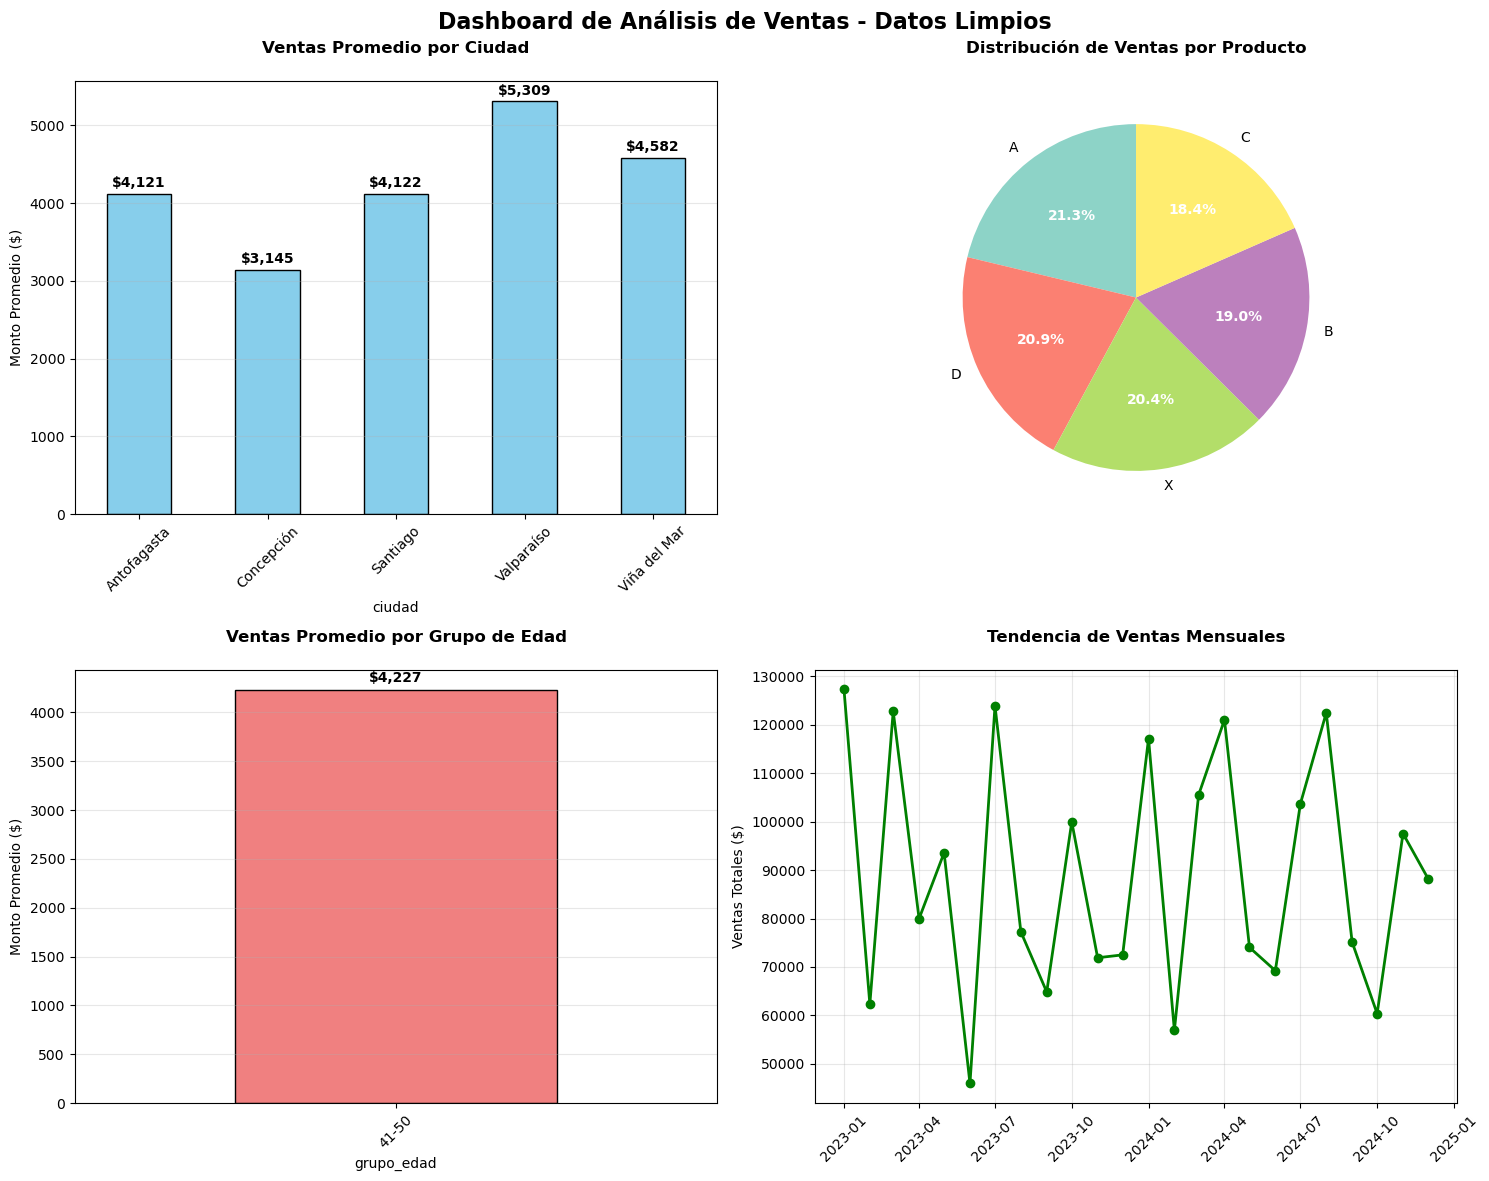

In [182]:
# Crear resumen integrado
resumen_integrado = pd.merge(ventas_clean, clientes_clean, on='id_cliente', how='left')

# Estadísticas del resumen
print(f"Registros finales después de limpieza:")
print(f"- Clientes: {len(clientes_clean)} (originalmente {len(df_clientes)})")
print(f"- Ventas: {len(ventas_clean)} (originalmente {len(df_ventas)})")

print(f"- Datos integrados: {len(resumen_integrado)} registros")
print(f"- Ventas con cliente identificado: {resumen_integrado['nombre'].notna().sum()}")
print(f"- Ventas anónimas: {resumen_integrado['nombre'].isna().sum()}")

# Exportación a archivos

# CSV del resumen
resumen_integrado.to_csv('resumen_integrado.csv', index=False)

# Excel con múltiples hojas
with pd.ExcelWriter('datos_limpios.xlsx', engine='openpyxl') as writer:
    clientes_clean.to_excel(writer, sheet_name='Clientes_Limpios', index=False)
    ventas_clean.to_excel(writer, sheet_name='Ventas_Limpias', index=False)
    resumen_integrado.to_excel(writer, sheet_name='Datos_Integrados', index=False)

# VISUALIZACIONES

# Configurar el estilo
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Dashboard de Análisis de Ventas - Datos Limpios', fontsize=16, fontweight='bold')

# 1. Ventas promedio por ciudad
ventas_por_ciudad = resumen_integrado.groupby('ciudad')['monto'].agg(['mean', 'count', 'sum']).round(2)
ax1 = ventas_por_ciudad['mean'].plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Ventas Promedio por Ciudad', fontweight='bold', pad=20)
axes[0,0].set_ylabel('Monto Promedio ($)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)
# Añadir valores en las barras
for i, v in enumerate(ventas_por_ciudad['mean']):
    axes[0,0].text(i, v + 50, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 2. Distribución de ventas por producto
ventas_por_producto = resumen_integrado['producto'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(ventas_por_producto)))
wedges, texts, autotexts = axes[0,1].pie(ventas_por_producto.values, 
                                        labels=ventas_por_producto.index,
                                        autopct='%1.1f%%',
                                        colors=colors,
                                        startangle=90)
axes[0,1].set_title('Distribución de Ventas por Producto', fontweight='bold', pad=20)
# Mejorar legibilidad de porcentajes
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 3. Ventas por grupo de edad
resumen_integrado['grupo_edad'] = pd.cut(resumen_integrado['edad'], 
                                       bins=[0, 30, 40, 50, 60, 100], 
                                       labels=['18-30', '31-40', '41-50', '51-60', '60+'])
ventas_por_edad = resumen_integrado.groupby('grupo_edad', observed=True)['monto'].mean()
ax3 = ventas_por_edad.plot(kind='bar', ax=axes[1,0], color='lightcoral', edgecolor='black')
axes[1,0].set_title('Ventas Promedio por Grupo de Edad', fontweight='bold', pad=20)
axes[1,0].set_ylabel('Monto Promedio ($)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(axis='y', alpha=0.3)
# Añadir valores en las barras
for i, v in enumerate(ventas_por_edad):
    axes[1,0].text(i, v + 50, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 4. Tendencia temporal de ventas
resumen_integrado['año_mes'] = resumen_integrado['fecha'].dt.to_period('M')
ventas_mensuales = resumen_integrado.groupby('año_mes')['monto'].sum().reset_index()
ventas_mensuales['fecha_plot'] = ventas_mensuales['año_mes'].dt.to_timestamp()
axes[1,1].plot(ventas_mensuales['fecha_plot'], ventas_mensuales['monto'], 
               marker='o', linewidth=2, markersize=6, color='green')
axes[1,1].set_title('Tendencia de Ventas Mensuales', fontweight='bold', pad=20)
axes[1,1].set_ylabel('Ventas Totales ($)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(alpha=0.3)

plt.tight_layout()

# Guardar con alta calidad
plt.savefig('dashboard_analisis_ventas.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Mostrar estadísticas de las visualizaciones
print("\nDOCUMENTACIÓN DE VISUALIZACIONES:")
print("1. Ventas promedio por ciudad:")
print("  - Identifica las ciudades más rentables por transacción")
print("  - Útil para estrategias de marketing regional")
print(f"  - Ciudad líder: {ventas_por_ciudad['mean'].idxmax()} (${ventas_por_ciudad['mean'].max():,.0f})")

print("2. Distribución por producto:")
print("   - Muestra participación de mercado de cada producto")
print("   - Crítico para decisiones de inventario y promociones")
print(f"   - Producto líder: {ventas_por_producto.index[0]} ({ventas_por_producto.iloc[0]} ventas)")

print("3. Ventas por grupo de edad:")
print("   - Segmentación demográfica del poder de compra")
print("   - Base para personalización de ofertas")
print(f"   - Grupo más rentable: {ventas_por_edad.idxmax()} (${ventas_por_edad.max():,.0f})")

print("4. Tendencia temporal:")
print("   - Patrones estacionales y crecimiento")
print("   - Fundamental para forecasting y planificación")
print(f"   - Periodo analizado: {ventas_mensuales['fecha_plot'].min().strftime('%m/%Y')} - {ventas_mensuales['fecha_plot'].max().strftime('%m/%Y')}")

plt.show()

In [183]:
# Estadísticas adicionales
print("\n--- ESTADÍSTICAS FINALES ---")
print(f"Total de ventas: ${resumen_integrado['monto'].sum():,.0f}")
print(f"Venta promedio: ${resumen_integrado['monto'].mean():.0f}")
print(f"Ciudad con mayores ventas: {ventas_por_ciudad.loc[ventas_por_ciudad['sum'].idxmax()].name}")
print(f"Producto más vendido: {ventas_por_producto.index[0]}")
print(f"Grupo de edad con mayor gasto: {ventas_por_edad.idxmax()}")


--- ESTADÍSTICAS FINALES ---
Total de ventas: $2,133,743
Venta promedio: $4319
Ciudad con mayores ventas: Santiago
Producto más vendido: A
Grupo de edad con mayor gasto: 41-50
